In [ ]:
# Chapter 11. Model Evaluation

In [1]:
# 11.1 Cross-Validating Models
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# load digits datasets
digits = datasets.load_digits()

# create feature and target matrix
features = digits.data
target = digits.target

# create scandalizer
standardizer = StandardScaler()

# create logistic regression object
logit = LogisticRegression()

# create a pipeline than standardizes , then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# create k fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,              # performance metric
                             scoring="accuracy", # loss function
                             n_jobs=-1)         # use all cpu cores

cv_results.mean()

np.float64(0.9677329000309502)

In [2]:
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

In [ ]:
# diffrence between tain test and k fold cross validation
from sklearn.model_selection import train_test_split

# create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                             target,
                                                                             test_size=0.1,
                                                                             random_state=1)

# fit standardizer tp training set
standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# -----------------------------------------------------------------
# create a pipeline
pipeline = make_pipeline(standardizer, logit)

# do k fold cross validation
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)

In [8]:
# 11.2 Creating a Baseline Regression Model
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

wine = load_wine()

features, target = wine.data, wine.target
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=0)

# create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# train dummy regressor
dummy.fit(features_train, target_train)

# get r squared error
dummy.score(features_test, target_test)

-0.0480213580840978

In [9]:
from sklearn.linear_model import LinearRegression

# train simple linear regression
ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.8043532631769537

In [ ]:
# create dummy regressor that predict 1s for everything
 
clf = DummyRegressor(strategy='constant', constant=1)

clf.fit(features_train, target_train) 
clf.score(features_test, target_test)

-0.06299212598425186

In [11]:
# 11.3 Creating a Baseline Classification Model

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

features, target = iris.data, iris.target

# split into tain and test sets
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=0)
dummy = DummyClassifier(strategy='uniform', random_state=1)

# train model
dummy.fit(features_train, target_train)

# get accuracy score
dummy.score(features_test, target_test)


0.42105263157894735

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

# train model
classifier.fit(features_train, target_train)

# get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

In [19]:
# 11.4 Evaluating Binary Classifier Predictions
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_classes= 2,
                           random_state=1)

# create logistic regression
logit = LogisticRegression()

# cross validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')


array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [21]:
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [22]:
cross_val_score(logit, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [23]:
cross_val_score(logit, X, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_hat)

0.947

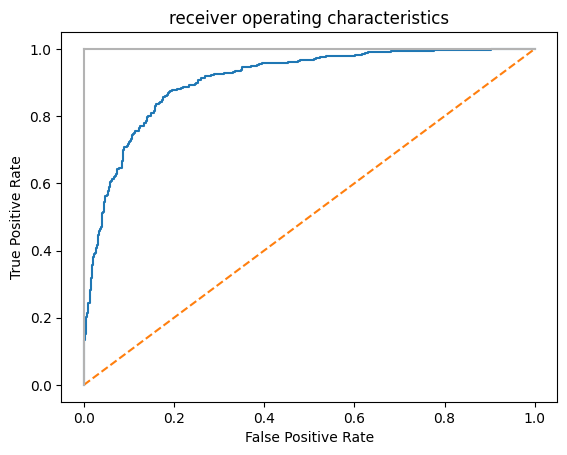

In [40]:
# 11.5 Evaluating Binary Classifier Thresholds
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# split into tain and test set
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.1,
                                                                            random_state=1)
# create classifier
logit = LogisticRegression()

# train mode
logit.fit(features_train, target_train)

# get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# plot ROC curve
plt.title("receiver operating characteristics")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7")
plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


In [41]:
logit.predict_proba(features_test)[0:1]

array([[0.8689235, 0.1310765]])

In [42]:
logit.classes_

array([0, 1])

In [43]:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.4981509475208573
True Positive Rate: 0.8367346938775511
False Positive Rate: 0.1627450980392157


In [45]:
print("Threshold:", threshold[49])
print("True Positive Rate:", true_positive_rate[49])
print("False Positive Rate:", false_positive_rate[49])

Threshold: 0.8058635463651345
True Positive Rate: 0.5653061224489796
False Positive Rate: 0.052941176470588235


In [1]:
# 11.6 Evaluating Multiclass Classifier Predictions
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant= 0,
                                       n_classes= 3,
                                       random_state=1)
logit = LogisticRegression()

cross_val_score(logit,features, target, scoring='accuracy')

array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

In [2]:
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84012014, 0.82895312, 0.82675308, 0.81515121, 0.82042629])

In [4]:
cross_val_score(logit, features, target, scoring='f1_weighted')

array([0.84013913, 0.8289688 , 0.82680304, 0.8151928 , 0.82048321])

In [5]:
cross_val_score(logit, features, target, scoring='f1_micro')

array([0.8405, 0.829 , 0.827 , 0.8155, 0.8205])

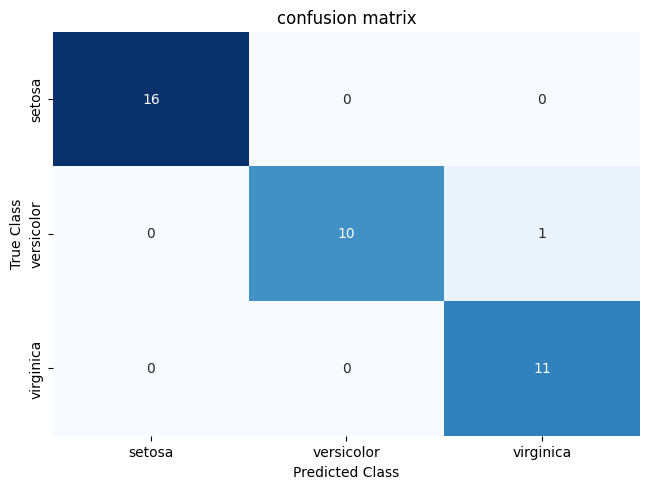

In [10]:
# 11.7 Visualizing a Classifier’s Performance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()

features, target = iris.data, iris.target

# create a list of target class name
class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=2)

# create a logistic regression
classifier = LogisticRegression()

# train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("confusion matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [11]:
df

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,10,1
virginica,0,0,11


In [13]:
# 11.8 Evaluating Regression Models

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise= 50,
                                   coef = False,
                                   random_state=1)

# create a linear regression
ols = LinearRegression()

cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [15]:
cross_val_score(ols, features, target, scoring='r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [6]:
# 11.9 Evaluating Clustering Models
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

features, _ = make_blobs(n_samples=1000,
                         n_features=10,
                         centers=2,
                         cluster_std=0.5,
                         shuffle=True,
                         random_state=1)

# cluster data using k means to predict classes
model = KMeans(n_clusters = 2, random_state=1).fit(features)

# get predicted classes
target_predicted = model.labels_

# evaluate model
silhouette_score(features, target_predicted)

0.8916265564072141

In [9]:
# 11.10 Creating a Custom Evaluation Metric
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   random_state=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target,test_size=0.10, random_state=1)

# create custom metric
def custom_metric(target_test, target_predicted):
    # calculate E2 square error
    r2 = r2_score(target_test, target_predicted)
    
    return r2

# Make scorer and define that higher scores are better
score = make_scorer(custom_metric, greater_is_better=True)

# create ridge regression object
classifier = Ridge()

# train ridge regression model
model = classifier.fit(features_train, target_train)

score(model, features_test, target_test)

0.9997906102882058

In [8]:
# predict values
target_predicted = model.predict(features_test)

r2_score(target_test, target_predicted)

0.9997906102882058

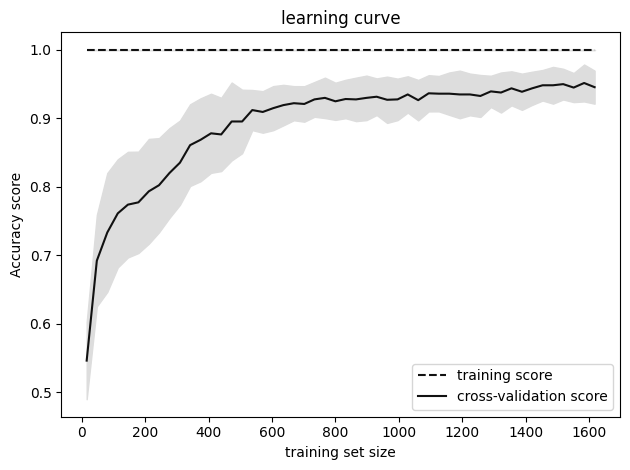

In [21]:
# 11.11 Visualizing the Effect of Training Set Size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        features,
                                                        target,
                                                        cv=10,      #  number of folds
                                                        scoring='accuracy',
                                                        n_jobs= -1,
                                                        train_sizes=np.linspace(0.01,1.0,50)) # training set

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="training score")
plt.plot(train_sizes, test_mean, color="#111111", label="cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# create plot
plt.title("learning curve")
plt.xlabel("training set size")
plt.ylabel("Accuracy score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [15]:
# 11.12 Creating a Text Report of Evaluation Metrics

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

iris = datasets.load_iris()

features, target = iris.data , iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# create logistic regression
classifier = LogisticRegression()

# train model and predict
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# create a classification report
print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



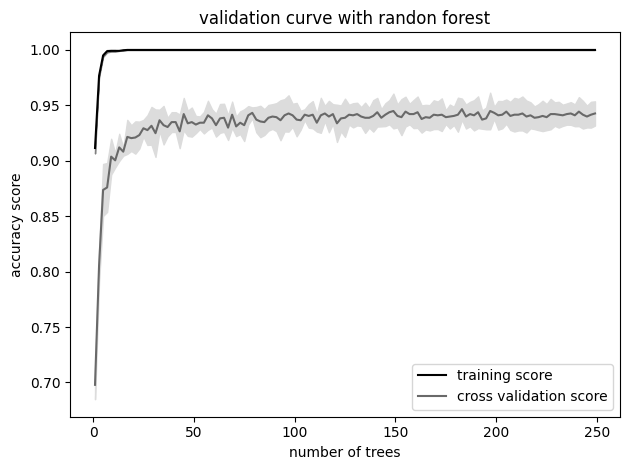

In [20]:
# 11.13 Visualizing the Effect of Hyperparameter Values
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits()

features, target = digits.data, digits.target

# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# create accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             features,
                                             target,
                                             param_name='n_estimators', # hyperparameter to examine
                                             param_range=param_range,
                                             cv=3,
                                             scoring='accuracy',
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std =np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std =np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="training score", color="black")
plt.plot(param_range, test_mean, label="cross validation score", color="dimgrey")

# plot accuracy bans for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color ="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("validation curve with randon forest")
plt.xlabel("number of trees")
plt.ylabel("accuracy score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()